In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/home/piyush/data/Advertising.csv',index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

In [6]:
import seaborn as sns
%matplotlib inline

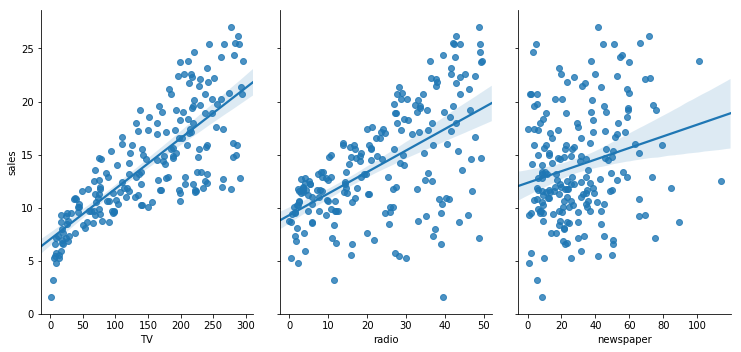

In [7]:
sns.pairplot(data,x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5,aspect=0.7, kind='reg')

In [8]:
feature_cols =['TV', 'radio', 'newspaper']
x = data[feature_cols]
print(type(x))
x.head()

<class 'pandas.core.frame.DataFrame'>


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# y = data['sales']
y = data.sales
print(type(y))
y.head()

<class 'pandas.core.series.Series'>


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [10]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(150, 3) (150,) (50, 3) (50,)


In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print(linreg.coef_)
print(linreg.intercept_)

[0.04656457 0.17915812 0.00345046]
2.87696662231793


In [14]:
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('radio', 0.1791581224508884),
 ('newspaper', 0.0034504647111804343)]

In [15]:
y_pred = linreg.predict(x_test)

In [16]:
true = [100,50,30,20]
pred = [90,50,50,30]

In [17]:
from sklearn import metrics
print((10+0+20+10)/4)
metrics.mean_absolute_error(true,pred)

10.0


10.0

In [18]:
metrics.mean_squared_error(true, pred)

150.0

In [19]:
import numpy as np
np.sqrt(metrics.mean_squared_error(true,pred))

12.24744871391589

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.4046514230328953

In [21]:
feature_cols =['TV', 'radio']
x = data[feature_cols]
y = data.sales
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382886

In [22]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
iris = load_iris()
x = iris.data
y = iris.target

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
# list(zip(x_test, y_test, y_pred))
metrics.accuracy_score(y_test, y_pred)


0.9736842105263158

In [25]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [28]:
print(scores.mean())

0.9666666666666668


In [29]:
# search for an optimal value of K for KNN
k_range = list(range(1,31))
k_scores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)    

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

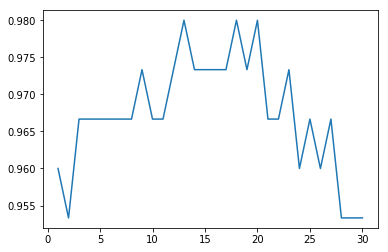

In [31]:
plt.plot(k_range, k_scores)


In [32]:
knn = KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()

0.9800000000000001

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean()

0.9533333333333334

In [34]:
# Cross-validation example: feature selection
# Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset
data = pd.read_csv('/home/piyush/data/Advertising.csv',index_col=0)
feature_cols =['TV', 'radio', 'newspaper']
x = data[feature_cols]
y = data.sales

In [40]:
lm = LinearRegression()
scores = cross_val_score(lm,x,y,cv=10,scoring='neg_mean_squared_error')

In [41]:
mse_scores = -scores
mse_scores

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [43]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
rmse_scores

array([1.88689808, 1.81595022, 1.44548731, 1.68069713, 1.14139187,
       1.31971064, 2.85891276, 1.45399362, 1.7443426 , 1.56614748])

In [44]:
rmse_scores.mean()

1.6913531708051797

In [46]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766
